In [1]:
%load_ext autoreload
%autoreload 2

import torch
from pytorch3d.io import load_objs_as_meshes
from pytorch3d.structures import Meshes
from pytorch3d.renderer import CamerasBase

from text3d2video.ipython_utils import display_ims
from text3d2video.rendering import render_depth_map

In [2]:
device = torch.device("cuda")
meshes = load_objs_as_meshes(["data/meshes/mixamo-human.obj"], device=device)

def mesh_views(mesh: Meshes, cameras: CamerasBase):
    frames = meshes.extend(len(cameras))
    depth_maps = render_depth_map(frames, cameras, resolution=100)
    display_ims(depth_maps)

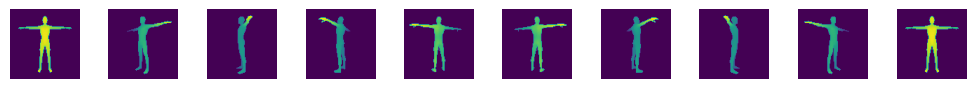

In [3]:
from text3d2video.camera_placement import turntable_cameras

cameras = turntable_cameras(2, 10, device)

mesh_views(meshes, cameras)

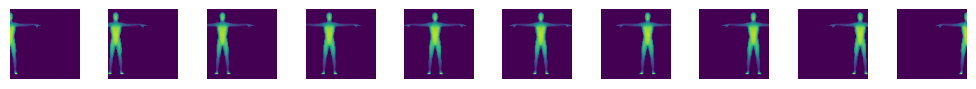

In [11]:
from text3d2video.camera_placement import sideways_orthographic_cameras


cameras = sideways_orthographic_cameras(1, -1, 10)
mesh_views(meshes, cameras)

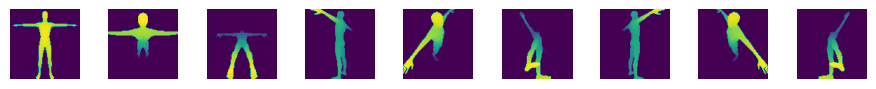

In [9]:
from text3d2video.camera_placement import multiview_cameras


cameras = multiview_cameras(meshes, 10, device=device)
mesh_views(meshes, cameras)

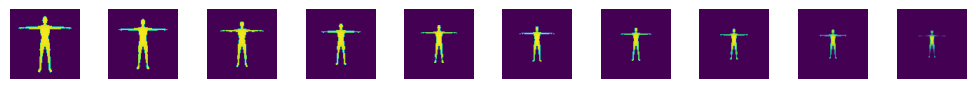

In [3]:
from text3d2video.camera_placement import z_movement_cameras

cameras = z_movement_cameras(device=device)
mesh_views(meshes, cameras)